In [138]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt


In [139]:

contexts = {
'Person':27480,
'TV Shows':7528,
'Brand Vertical':4331,
'Entities [Entity Service]':3714,
'Brand Category':3492,
'Interests and Hobbies Vertical':2597,
'Ongoing News Story':2290,
'Brand':2131,
'Events [Entity Service]':1610,
'Interests and Hobbies Category':1416,
'Video Game':1070,
'Music Genre':900,
'States':887,
'Multimedia Franchise':868,
'Cities':698,
'Interests and Hobbies':693,
'Political Body':627,
'Sport':588,
'Sports Team':551,
'Sports Event':528,
'Fan Community':515,
'Movie':496,
'Music Album':368,
'Reoccurring Trends':284}

testing_contexts = ['Video Game', 'Music Genre', 'Cities', 'Sport']

dict_words = {}
# Cambridge 
'''
dict_words['Video Game'] = {
    'definition': ["a", "game", "in", "which", "the", "player", "controls", "moving", "pictures", "on", "a", "screen", "by", "pushing", "buttons", "His", "new", "video", "game", "is", "apparently", "selling", "like", "hot", "cakes", "", "He", "gets", "really", "hyped", "up", "when", "he", "s", "playing", "video", "games", "", "That", "video", "game", "is", "really", "neat", "", "The", "problem", "with", "video", "games", "is", "that", "they", "re", "addictive", "", "a", "game", "in", "which", "the", "player", "controls", "moving", "pictures", "on", "a", "television", "screen", "by", "pressing", "buttons", "or", "moving", "a", "short", "handle", "", "The", "best", "video", "games", "involve", "using", "your", "imagination", "to", "solve", "problems", "", "If", "you", "re", "going", "to", "completely", "change", "the", "tone", "and", "concept", "from", "the", "video", "game", "", "why", "even", "base", "it", "on", "the", "franchise", "", "I", "m", "pretty", "sure", "this", "movie", "will", "go", "down", "as", "just", "another", "bad", "video", "game", "movie", "", "Nobody", "else", "s", "daughter", "is", "in", "that", "video", "game", "", "If", "you", "like", "your", "history", "to", "be", "accurate", "", "this", "isn", "t", "your", "kind", "of", "video", "game", "", "But", "it", "s", "the", "near", "film", "quality", "cutscenes", "that", "steal", "the", "show", "and", "almost", "make", "you", "forget", "you", "re", "playing", "a", "video", "game", "", "Is", "there", "such", "a", "thing", "as", "video", "game", "addiction", "", "It", "is", "the", "highest", "grossing", "video", "game", "of", "all", "time", "", "With", "those", "kinds", "of", "reasoning", "powers", "", "kids", "can", "handle", "a", "video", "game", "that", "doesn", "t", "even", "claim", "to", "be", "real", "", "November", "is", "one", "of", "the", "two", "most", "important", "months", "for", "sales", "in", "the", "video", "game", "industry", "", "and", "this", "year", "s", "was", "a", "big", "one", "", "One", "of", "the", "coolest", "bits", "of", "video", "game", "technology", "to", "come", "to", "gaming", "in", "2011", "doesn", "t", "even", "require", "electricity", "to", "operate", "", "Like", "any", "great", "video", "game", "", "her", "music", "is", "imaginative", "", "immersive", "and", "highly", "addictive", "", "By", "further", "distancing", "us", "from", "the", "battlefield", "", "they", "ll", "turn", "war", "into", "a", "very", "real", "video", "game", "", "The", "document", "offers", "a", "specific", "example", "of", "a", "video", "game", "blogger", "who", "gets", "a", "free", "game", "system", "that", "he", "later", "talks", "about", "on", "his", "blog", "", "Some", "are", "dismissing", "the", "video", "as", "a", "marketing", "campaign", "for", "a", "video", "game", "or", "movie", "and", "not", "a", "real", "threat", "", "The", "video", "game", "provides", "the", "distraction", "that", "overwhelms", "the", "senses", "and", "diverts", "the", "brain", "s", "attention", "away", "from", "processing", "the", "pain", "signals"],
    'related': ["acrostic"," air hockey"," bagatelle"," beer pong"," bingo"," boomerang"," bran tub"," buildering"," bungee"," bungee jump"," bungee jumping"," cage diving"," charade"," Chinese puzzle"," coloring book"," computer game"," crossword"," cryptic crossword"," cycling"," dice"," die"," domino"," draw"," drinking game"," e-sports"," egg-and-spoon race"," escape room"," fell running"," fetch"," footgolf"," free running"," freestyle football"," Frisbee"," game console"," gamification"," gaming"," glassing"," go"," Hacky Sack"," hangman"," hoopla"," horseshoe"," in-game"," inline"," inline skate"," inline skating"," jigsaw"," jigsaw puzzle"," juggling"," jump rope"," keepy-uppy"," kite"," korfball"," LARP"," LARPer"," level"," level sth up"," level up"," lotto"," magnet fishing"," maze"," noughts and crosses"," NPC"," origami"," paintball"," paintballing"," parkour"," parlor game"," people watching"," pinball"," pinball machine"," Pokémon"," pop quiz"," power-up"," pub quiz"," puzzle"," quidditch"," quizzing"," quoits"," raffle"," resistance training"," ringtoss"," role-playing game"," roller skate"," roller-skating"," Rollerblade"," rounders"," RPG"," scavenger hunt"," screen time"," shoot-em-up"," shooter"," skin"," skip"," skipping rope"," social game"," softball"," stoop ball"," story mode"," subworld"," sudoku"," table football"," tabletop"," tailgating"," three-legged race"," tic-tac-toe"," tiddlywink"," tiddlywinks"," touch football"," trail running"," treasure hunt"," tug of war"," video game"," Wii"," word search"," yo-yoing"," zorbing"]
}
'''
dict_words['Video Game'] = {
    'subject': ['Video Game'],
    'synonymous': ["computer game", "Nintendo", "Playstation", "Xbox", "computerized game", "electronic game"],
    'definition': ["any","of","various","interactive","games","played","using","a","specialized","electronic","gaming","device","or","a","computer","or","mobile","device","and","a","television","or","other","display","screen,","along","with","a","means","to","control","graphic","images","any","of","various","games","played","using","a","microchip-controlled","device,","as","an","arcade","machine","or","handheld","toy"],
    'definition_synonymous': ["all", "each", "either", "several", "a bit", "a little", "each and every", "in general", "part of", "whatever", "about", "appertaining to", "appropriate to", "as concerns", "as regards", "attributed to", "away from", "based on", "belonging to", "characterized by", "coming from", "concerning", "connected with", "consisting of", "containing", "epithetical", "going from", "in reference to", "in regard to", "like", "made from", "out from", "out of", "peculiar to", "pertaining to", "proceeding from", "referring to", "regarding", "related to", "showing", "assorted", "different", "discrete", "disparate", "distinct", "diverse", "diversified", "individual", "numerous", "separate", "sundry", "varied", "all manner of", "changeable", "changing", "distinctive", "heterogeneous", "legion", "manifold", "many", "many-sided", "multifarious", "multitudinal", "multitudinous", "omnifarious", "peculiar", "populous", "several", "unalike", "unequal", "unlike", "variant", "variegated", "bilateral", "collective", "reciprocal", "associated", "communal", "conjoint", "conjunct", "connected", "convertible", "correlative", "dependent", "give-and-take", "given and taken", "interchangeable", "interchanged", "interdependent", "intermutual", "joint", "partaken", "participated", "public", "reciprocated", "related", "requited", "respective", "returned", "two-sided", "united", "contest", "drill", "events", "exercises", "practice", "recreation", "workout", "baited", "bamboozled", "betrayed", "conned", "culled", "duped", "fooled", "gulled", "had", "hoaxed", "hoodwinked", "lured", "snared", "taken", "trapped", "victimized", "accepting", "adopting", "applying", "employing", "practicing", "proving", "testing", "working", "an", "one", "functional", "particular", "specially designed", "computerized", "anodic", "autoelectronic", "cathodic", "photoelectronic", "thermionic", "voltaic", "action", "speculation", "staking", "laying odds", "accessory", "apparatus", "appliance", "equipment", "gadget", "gear", "machine", "material", "mechanism", "agent", "arrangement", "article", "construction", "contraption", "contrivance", "creation", "doohickey", "expedient", "gimmick", "implement", "invention", "makeshift", "means", "medium", "outfit", "resort", "resource", "rigging", "shift", "tackle", "thingamabob", "utensil", "whatchamacallit", "whatnot", "Rube Goldberg invention", "whatsit", "CPU", "PC", "abacus", "analog", "brain", "calculator", "clone", "laptop", "mac", "mainframe", "microcomputer", "mini", "minicomputer", "adding machine", "artificial intelligence", "data processor", "digital", "electronic brain", "micro", "number cruncher", "personal computer", "thinking machine", "ambulatory", "fluid", "free", "itinerant", "liquid", "locomotive", "migrant", "motile", "peripatetic", "portable", "roving", "wandering", "adaptable", "changeable", "loose", "migratory", "motorized", "moving", "mutable", "nomadic", "roaming", "unsettled", "unstable", "unstationary", "unsteadfast", "unsteady", "versatile", "TV set", "audio", "box", "station", "video", "TV", "baby-sitter", "eye", "receiver", "telly", "tube", "boob tube", "idiot box", "small screen", "vid", "act", "array", "demonstration", "example", "exhibit", "parade", "presentation", "affectation", "arrangement", "blaze", "bravura", "dash", "exhibition", "expo", "exposition", "exposure", "fanfare", "flourish", "frame-up", "frippery", "front", "layout", "manifestation", "ostentation", "ostentatiousness", "pageant", "panorama", "pedantry", "pomp", "pretension", "pretentiousness", "revelation", "sample", "scheme", "shine", "showboat", "splash", "splendor", "splurge", "spread", "unfolding", "vanity", "arrayal", "for show", "grandstand play", "cover", "curtain", "net", "awning", "canopy", "cloak", "concealment", "covering", "divider", "envelope", "guard", "hedge", "mantle", "mask", "partition", "security", "shade", "shelter", "shield", "shroud", "veil", "aid", "channel", "equipment", "factor", "instrument", "measure", "mechanism", "medium", "mode", "power", "process", "route", "step", "system", "tactic", "technique", "vehicle", "agency", "agent", "apparatus", "auspices", "avenue", "course", "dodge", "expedient", "fashion", "gimmick", "instrumentality", "instrumentation", "intermediary", "machinery", "manner", "ministry", "organ", "organization", "paraphernalia", "path", "road", "trick", "modus operandi", "stepping-stone", "ways and means", "authority", "curb", "discipline", "domination", "force", "government", "jurisdiction", "management", "oversight", "regulation", "restraint", "restriction", "rule", "supervision", "ascendancy", "bridle", "charge", "check", "clout", "containment", "determination", "direction", "dominion", "guidance", "juice", "limitation", "manipulation", "might", "predomination", "qualification", "regimentation", "ropes", "strings", "subjection", "subordination", "superintendence", "supremacy", "sway", "weight", "driver seat", "inside track", "upper hand", "wire pulling", "concrete", "stirring", "striking", "telling", "colorful", "compelling", "comprehensible", "convincing", "definite", "descriptive", "detailed", "distinct", "eloquent", "expressive", "figurative", "forcible", "illustrative", "incisive", "intelligible", "lively", "lucid", "moving", "perspicuous", "picturesque", "precise", "realistic", "strong", "unequivocal", "vivid", "appearance", "copy", "drawing", "figure", "form", "icon", "illustration", "likeness", "model", "photograph", "picture", "portrait", "statue", "angel", "carbon", "double", "effigy", "equal", "equivalent", "facsimile", "idol", "match", "photocopy", "reflection", "replica", "reproduction", "similitude", "simulacrum", "carbon copy", "carved figure", "chip off old block", "dead ringer", "simulacre", "spitting image", "chip", "circuitry", "microprocessor", "silicon chip", "IC", "computer chip", "logic circuit", "microcircuit", "microelectronics", "microprocessor chip", "semiconductor chip", "transputer", "composed", "contained", "disciplined", "guarded", "restrained", "calm", "cool", "inhibited", "self-controlled", "self-restrained", "under control", "unflappable", "gallery", "mall", "walkway", "cloister", "colonnade", "loggia", "passageway", "piazza", "portico", "stoa", "apparatus", "appliance", "automobile", "engine", "gadget", "instrument", "motor", "tool", "vehicle", "automaton", "computer", "contraption", "contrivance", "implement", "mechanism", "robot", "thingamabob", "widget", "constraint", "grasp", "restraint", "anchor", "brace", "catch", "cinch", "cincture", "clamp", "clamping", "clench", "clinch", "clutch", "coercion", "crushing", "duress", "enclosing", "enclosure", "fastening", "fixing", "grapnel", "grapple", "gripe", "handclasp", "handgrip", "handshake", "hold", "hook", "ligature", "lug", "purchase", "snatch", "squeeze", "strength", "tenure", "vise", "wrench", "doll", "plaything", "trinket", "bauble", "curio", "game", "knickknack", "novelty", "trifle"]
}
weights = {'subject':2**3, 'synonymous':2**2, 'definition':2**1, 'definition_synonymous':2**0}




In [140]:

video_game_words = []
for word_list in dict_words['Video Game'].values():
    video_game_words += word_list
video_game_words = set(video_game_words)
video_game_words

{'CPU',
 'IC',
 'Nintendo',
 'PC',
 'Playstation',
 'Rube Goldberg invention',
 'TV',
 'TV set',
 'Video Game',
 'Xbox',
 'a',
 'a bit',
 'a little',
 'abacus',
 'about',
 'accepting',
 'accessory',
 'act',
 'action',
 'adaptable',
 'adding machine',
 'adopting',
 'affectation',
 'agency',
 'agent',
 'aid',
 'all',
 'all manner of',
 'along',
 'ambulatory',
 'an',
 'analog',
 'anchor',
 'and',
 'angel',
 'anodic',
 'any',
 'apparatus',
 'appearance',
 'appertaining to',
 'appliance',
 'applying',
 'appropriate to',
 'arcade',
 'arrangement',
 'array',
 'arrayal',
 'article',
 'artificial intelligence',
 'as',
 'as concerns',
 'as regards',
 'ascendancy',
 'associated',
 'assorted',
 'attributed to',
 'audio',
 'auspices',
 'authority',
 'autoelectronic',
 'automaton',
 'automobile',
 'avenue',
 'away from',
 'awning',
 'baby-sitter',
 'baited',
 'bamboozled',
 'based on',
 'bauble',
 'belonging to',
 'betrayed',
 'bilateral',
 'blaze',
 'boob tube',
 'box',
 'brace',
 'brain',
 'bravur

In [141]:
len(video_game_words)

575

In [142]:
embeddings_dict={}
with open('C:/Users/marci/Documents/Portfolio/TwitterClassification/TwitterStream/data/glove.6B.50d.txt','rb') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector
embeddings_dict[b'test']

array([ 0.13175 , -0.25517 , -0.067915,  0.26193 , -0.26155 ,  0.23569 ,
        0.13077 , -0.011801,  1.7659  ,  0.20781 ,  0.26198 , -0.16428 ,
       -0.84642 ,  0.020094,  0.070176,  0.39778 ,  0.15278 , -0.20213 ,
       -1.6184  , -0.54327 , -0.17856 ,  0.53894 ,  0.49868 , -0.10171 ,
        0.66265 , -1.7051  ,  0.057193, -0.32405 , -0.66835 ,  0.26654 ,
        2.842   ,  0.26844 , -0.59537 , -0.5004  ,  1.5199  ,  0.039641,
        1.6659  ,  0.99758 , -0.5597  , -0.70493 , -0.0309  , -0.28302 ,
       -0.13564 ,  0.6429  ,  0.41491 ,  1.2362  ,  0.76587 ,  0.97798 ,
        0.58507 , -0.30176 ], dtype=float32)

In [143]:

def find_closest_embeddings(embedding):
   return sorted(embeddings_dict.keys(), key=lambda word:
       spatial.distance.euclidean(embeddings_dict[word], embedding)
    )

In [144]:
videogame_words = find_closest_embeddings(embeddings_dict[b"videogame"])
music_words = find_closest_embeddings(embeddings_dict[b"music"])
cities_words = find_closest_embeddings(embeddings_dict[b"cities"])
sport_words = find_closest_embeddings(embeddings_dict[b"sport"])

In [145]:
videogame_similars = np.asarray(videogame_words[:500])
music_similars = np.asarray(music_words[:500])
city_similars = np.asarray(cities_words[:500])
sport_similars = np.asarray(sport_words[:500])

array([205, 287, 269, ..., 234,  47,   1])

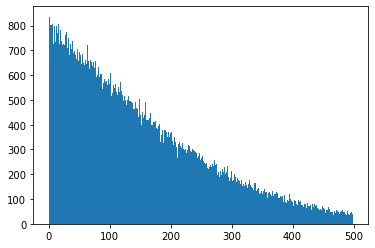

In [146]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 500)
xU, xL = x + 500, x
prob = ss.norm.cdf(xU, scale = 249) - ss.norm.cdf(xL, scale = 250)
prob = prob / prob.sum() # normalize the probabilities so their sum is 1
rand_arr = np.random.choice(x, size = 16*10000, p = prob)
plt.hist(rand_arr, bins=len(x))
rand_arr

In [147]:
def get_artificial_phrase_matrix(seed):
    np.random.seed(seed)
    artificial_phrase_matrix = []
    for i in range(10000):
        phrase_size = np.random.randint(1,17)
        artificial_phrase_matrix.append(np.random.choice(x, size = phrase_size, p = prob))
    return artificial_phrase_matrix

In [148]:
videogame_apm = get_artificial_phrase_matrix(1)
music_apm = get_artificial_phrase_matrix(2)
city_apm = get_artificial_phrase_matrix(3)
sport_apm = get_artificial_phrase_matrix(4)

In [149]:
artificial_db = {
    'videogame':{
        'apm': videogame_apm, 
        'similar_words': videogame_similars
        },
    'music': {
        'apm': music_apm,
        'similar_words': music_similars
        },
    'city': {
        'apm': city_apm,
        'similar_words': city_similars
        },
    'sport': {
        'apm': sport_apm,
        'similar_words': sport_similars
        }
}

In [150]:
for subject_name in artificial_db.keys():
    subject = artificial_db[subject_name]
    sents = []
    for idx_list in subject['apm']:
        sent = subject['similar_words'][idx_list]
        sents.append(sent)
    subject['sentences'] = sents
    print('subject: ', subject_name)
    print(subject['sentences'][:2])

subject:  videogame
[array([b'licensees', b'alchemist', b'toonz', b'ics', b'snes', b'vpro'],
      dtype='|S17'), array([b'then-new', b'vpro', b'pgp', b'ruggedized', b'vb', b'visio',
       b'hobbyist', b'ps3'], dtype='|S17')]
subject:  music
[array([b'musician', b'soulful', b'new', b'dancing', b'trio', b'genre',
       b"'80s", b'performed', b'dancing'], dtype='|S16'), array([b'composed', b'hip', b'featured', b'blues', b'musician'],
      dtype='|S16')]
subject:  city
[array([b'southeast', b'corridor', b'across', b'alone', b'few', b'places',
       b'where', b'bringing', b'residents', b'connecting', b'outside'],
      dtype='|S14'), array([b'organized', b'populous', b'airports', b'municipal', b'suburbs',
       b'dozens', b'besides', b'of', b'capital', b'operate', b'and',
       b'most', b'north', b'additionally', b'well'], dtype='|S14')]
subject:  sport
[array([b'once', b'youth', b'paralympic', b'sportscar', b'good', b'model',
       b'motorcycle', b'here', b'doing', b'means', b'spor

# Bag of Words representation

In [151]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [152]:
for subject_name in artificial_db.keys():
    subject = artificial_db[subject_name]
    phrases = []
    for byte_list in subject['sentences']:
        word_list = list(map(lambda b: b.decode('UTF-8'), byte_list))
        phrase = ' '.join(word_list)
        phrases.append(phrase)
    subject['phrases'] = phrases
    print('subject: ', subject_name)
    print(subject['phrases'][:2])

subject:  videogame
['licensees alchemist toonz ics snes vpro', 'then-new vpro pgp ruggedized vb visio hobbyist ps3']
subject:  music
["musician soulful new dancing trio genre '80s performed dancing", 'composed hip featured blues musician']
subject:  city
['southeast corridor across alone few places where bringing residents connecting outside', 'organized populous airports municipal suburbs dozens besides of capital operate and most north additionally well']
subject:  sport
['once youth paralympic sportscar good model motorcycle here doing means sports', 'importantly rarely bicycle good sports athletics competes jockey amateur nordic baseball example youth formula neither']


In [153]:
random_tweets = pd.read_csv('C:/Users/marci/Documents/Portfolio/TwitterClassification/TwitterStream/data/random_tweets_cleaned.csv')
random_tweets = random_tweets.dropna()
random_tweets.head()

,id,text
0,1537864080857649152,Happy birthday!!!!!
1,1537860083668832256,Jeongin now joining the crew and his weapon is...
2,1537825048635097088,Interviewed more than 400 people and confirmed...
3,1537837652522651649,"Ass torture !! this is called ass torture, wh..."
4,1537845005129326592,Need for help!! im a victim of domestic abuse ...


In [154]:
cv = CountVectorizer()
random_tweets_phrases = list(random_tweets.text)
for subject in artificial_db:
    random_tweets_phrases += artificial_db[subject]['phrases']
cv = cv.fit(random_tweets_phrases)

In [155]:
for subject_name in artificial_db:
    subject = artificial_db[subject_name]
    subject['sparse_vectorized_phrases'] = cv.transform(subject['phrases'])

In [158]:
# Quantidade de palavras encontradas
len(cv.vocabulary_.keys())

78484

# Training Model with sparse data